<a href="https://colab.research.google.com/github/Danzai-kun/Proj_/blob/main/KidneyStonePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Thu May 22 13:42:37 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   52C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
pip install --upgrade tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 862.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 119.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 127.1 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have t

In [ ]:
!pip install split-folders

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os, shutil, sys, json, re, random
import tensorflow as tf
import cv2
from PIL import Image, ImageOps
import scipy.ndimage as ndi
from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img , img_to_array
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPool2D
import matplotlib.pyplot as plt
from skimage import transform
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
import seaborn as sns
import splitfolders

In [ ]:
Project_name = "Kidney-Stone-Detection"

In [ ]:
Kidneystone = os.listdir('/content/drive/MyDrive/KidneystoneDataset')

In [ ]:
print(Kidneystone)

['STONE', 'Normal']


In [ ]:
normal_dir = '/content/drive/MyDrive/KidneystoneDataset/Normal'
stone_dir = '/content/drive/MyDrive/KidneystoneDataset/STONE'

In [ ]:
len(os.listdir(normal_dir)), len(os.listdir(stone_dir))

(5905, 3389)

In [ ]:
path_main = '/content/drive/MyDrive/KidneystoneDataset'
for folder in os.listdir(path_main):
    list_of_elements = os.listdir(os.path.join(path_main, folder))
    print(f'Folder: {folder}')
    print(f'Number of elements: {len(list_of_elements)}')
    print(f'First item\'s name: {list_of_elements[0]}\n')
    print('-------------------------------------')


Folder: STONE
Number of elements: 3389
First item's name: STONE- (3160).jpg

-------------------------------------
Folder: Normal
Number of elements: 5905
First item's name: Normal- (541).jpg

-------------------------------------


In [ ]:
def plot_imgs(item_dir, num_imgs=25):
    all_item_dirs = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:num_imgs]

    plt.figure(figsize=(10, 10))
    for idx, img_path in enumerate(item_files):
        plt.subplot(5, 5, idx+1)
        img = Image.open(img_path).convert("RGB")
        plt.title(f'{img_path}'[-10:-4])
        plt.imshow(img)

    plt.tight_layout()

In [ ]:
path_normal = normal_dir
path_stone = stone_dir

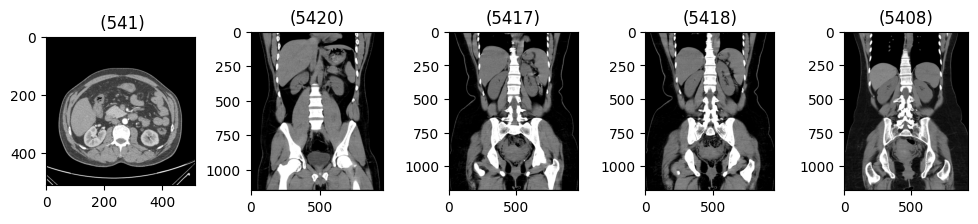

In [ ]:
plot_imgs(path_normal, 5)

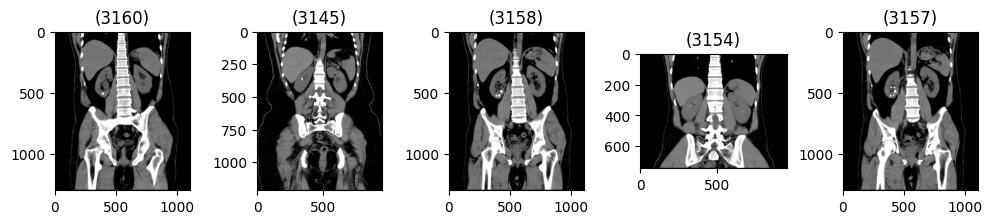

In [ ]:
plot_imgs(path_stone, 5)

In [ ]:
import os
import cv2
import numpy as np

def preprocess_and_save(folder, label_name, output_dir, IMG_SIZE):
    os.makedirs(os.path.join(output_dir, label_name), exist_ok=True)

    for idx, filename in enumerate(os.listdir(folder)):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        if img is not None:
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            img = cv2.GaussianBlur(img, (3, 3), 0)
            img = cv2.equalizeHist(img)
            img = img / 255.0
            img = (img * 255).astype(np.uint8)  # Scale back for saving
            save_path = os.path.join(output_dir, label_name, f"{label_name}_{idx}.jpg")
            cv2.imwrite(save_path, img)


In [ ]:
normal_dir = '/content/drive/MyDrive/KidneystoneDataset/Normal'
stone_dir = '/content/drive/MyDrive/KidneystoneDataset/STONE'
output_dir = '/content/preprocessed_dataset'

IMG_SIZE = 224

preprocess_and_save(normal_dir, 'normal', output_dir, IMG_SIZE)
preprocess_and_save(stone_dir, 'stone', output_dir, IMG_SIZE)

In [ ]:
processed_normal_dir = '/content/preprocessed_dataset/normal'
processed_stone_dir = '/content/preprocessed_dataset/stone'

In [ ]:
len(os.listdir(processed_normal_dir)), len(os.listdir(processed_stone_dir))

(5905, 3388)

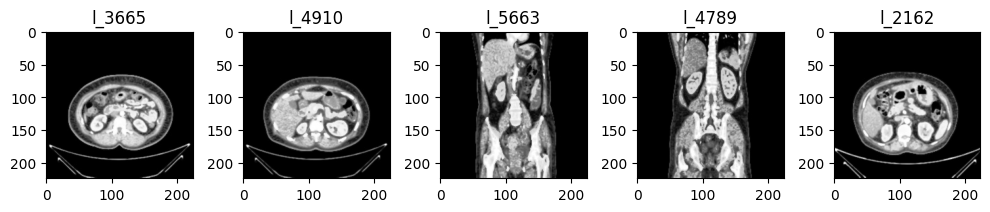

In [ ]:
plot_imgs(processed_normal_dir, 5)

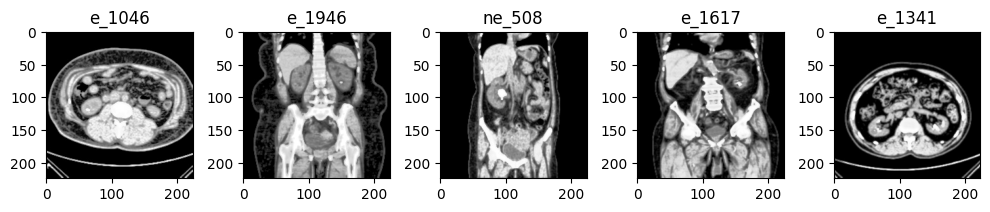

In [ ]:
plot_imgs(processed_stone_dir, 5)

In [ ]:
from tqdm import tqdm
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
import numpy as np
import os
from tqdm import tqdm

IMG_SIZE = 224

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, pooling='avg')
model = Model(inputs=base_model.input, outputs=base_model.output)

def extract_vgg16_features(folder_path):
    features = []
    for fname in tqdm(os.listdir(folder_path), desc=f"Extracting from {folder_path}"):
        img_path = os.path.join(folder_path, fname)
        img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
        img = img.convert('RGB')  # Ensure 3 channels
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)  # Required for VGG16
        feature = model.predict(img_array)
        features.append(feature.squeeze())
    return np.array(features)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
normal_dir = '/content/preprocessed_dataset/normal'
stone_dir = '/content/preprocessed_dataset/stone'

normal_features = extract_vgg16_features(normal_dir)
stone_features = extract_vgg16_features(stone_dir)

normal_labels = np.zeros(len(normal_features))
stone_labels = np.ones(len(stone_features))

X = np.concatenate([normal_features, stone_features], axis=0)
y = np.concatenate([normal_labels, stone_labels], axis=0)

print("Feature shape:", X.shape)
print("Label shape:", y.shape)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Optional: Convert labels to one-hot if needed
# y_train = to_categorical(y_train, 2)
# y_test = to_categorical(y_test, 2)

model = Sequential([
    Dense(256, activation='relu', input_shape=(X.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.6187 - loss: 1.0621 - val_accuracy: 0.8473 - val_loss: 0.3462
Epoch 2/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8191 - loss: 0.3991 - val_accuracy: 0.9220 - val_loss: 0.1977
Epoch 3/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8808 - loss: 0.2565 - val_accuracy: 0.9321 - val_loss: 0.1505
Epoch 4/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9150 - loss: 0.1832 - val_accuracy: 0.9361 - val_loss: 0.1272
Epoch 5/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9274 - loss: 0.1569 - val_accuracy: 0.9435 - val_loss: 0.1146
Epoch 6/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9306 - loss: 0.1391 - val_accuracy: 0.9442 - val_loss: 0.1068
Epoch 7/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9394 - loss: 0.1293 - val_accuracy: 0.9455 - val_loss: 0.1063
Epoch 8/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9342 - loss: 0.1298 - val_accuracy: 0

In [ ]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.4f}")

In [ ]:
y_pred = model.predict(X_test)
y_pred_labels = (y_pred > 0.5).astype(int).flatten()

59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:")
print(classification_report(y_test, y_pred_labels, target_names=['Normal', 'Stone']))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_labels))

Classification Report:
              precision    recall  f1-score   support

      Normal       0.97      0.98      0.98      1181
       Stone       0.97      0.95      0.96       678

    accuracy                           0.97      1859
   macro avg       0.97      0.96      0.97      1859
weighted avg       0.97      0.97      0.97      1859

Confusion Matrix:
[[1158   23]
 [  35  643]]


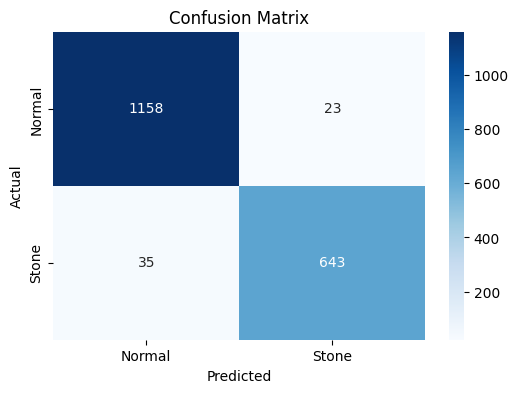

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

cm = confusion_matrix(y_test, y_pred_labels)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Stone'], yticklabels=['Normal', 'Stone'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


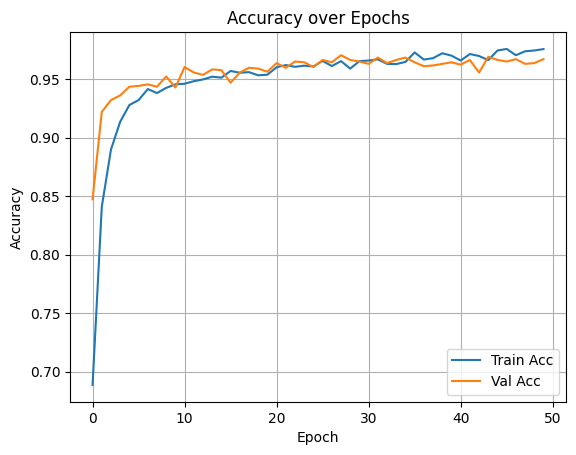

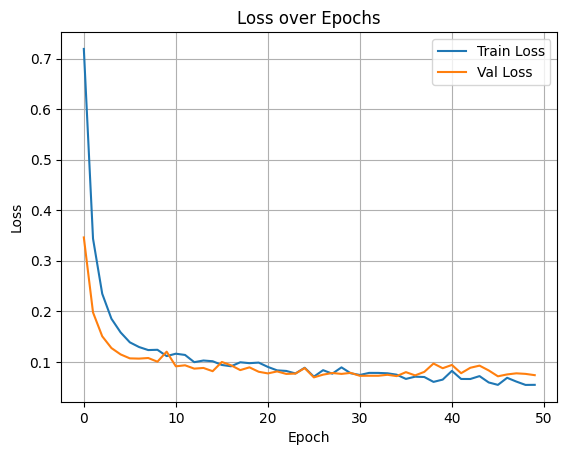

In [ ]:
# Accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model

def preprocess_and_extract(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (224, 224))
    img = cv2.GaussianBlur(img, (3, 3), 0)
    img = cv2.equalizeHist(img)
    img = img / 255.0
    img = (img * 255).astype(np.uint8)

    # Convert to RGB and preprocess
    img_rgb = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    img_rgb = np.expand_dims(img_rgb, axis=0)
    img_rgb = preprocess_input(img_rgb)

    # VGG16 with GAP
    base_model = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    model_extract = Model(inputs=base_model.input, outputs=x)

    features = model_extract.predict(img_rgb)
    return features


In [ ]:
img_path = '/content/drive/MyDrive/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Folder2/NormalFkae.jpg'
features = preprocess_and_extract(img_path)
prediction = model.predict(features)

if prediction[0] > 0.5:
    print("Predicted: Stone")
else:
    print("Predicted: Normal")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 932ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted: Stone


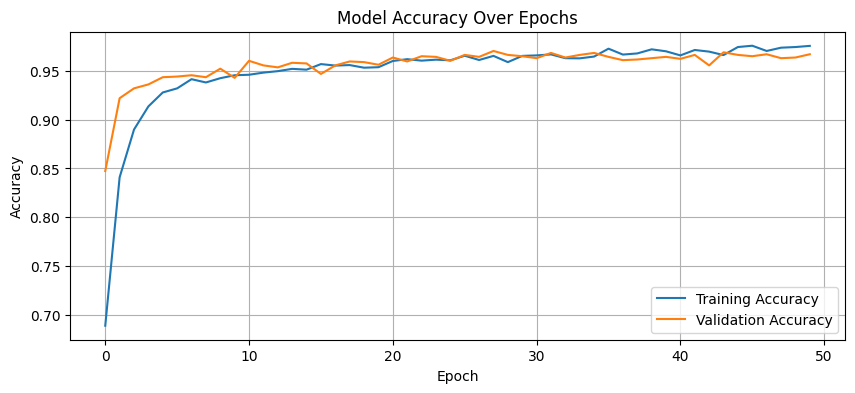

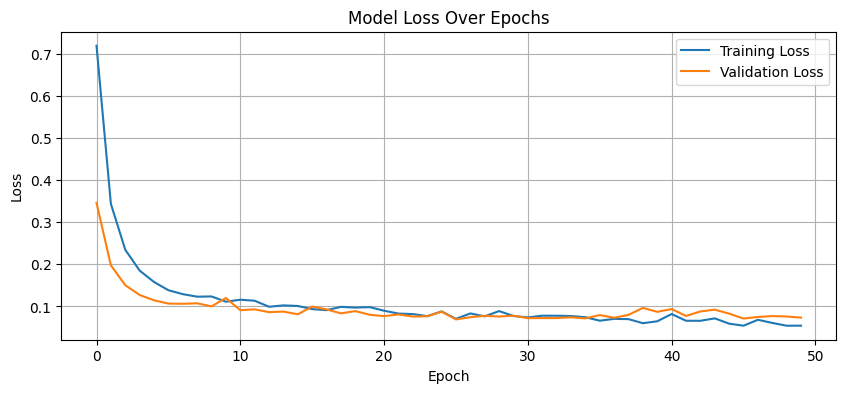

In [ ]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(10, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


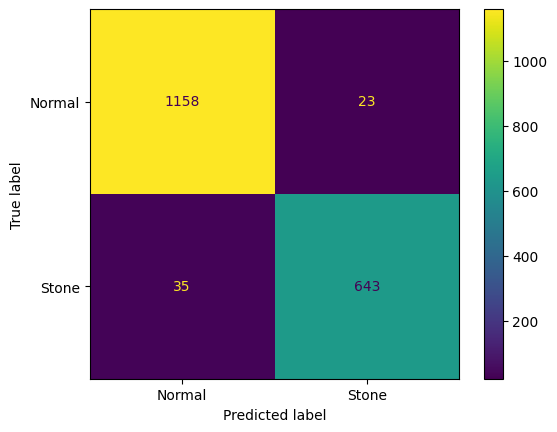

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
y_pred_labels = (y_pred > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Stone"])
disp.plot()


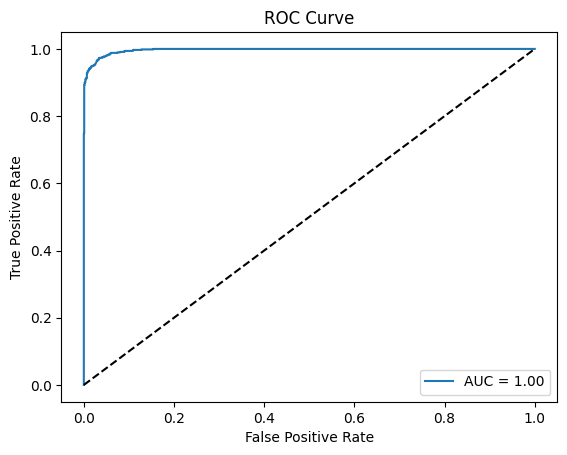

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


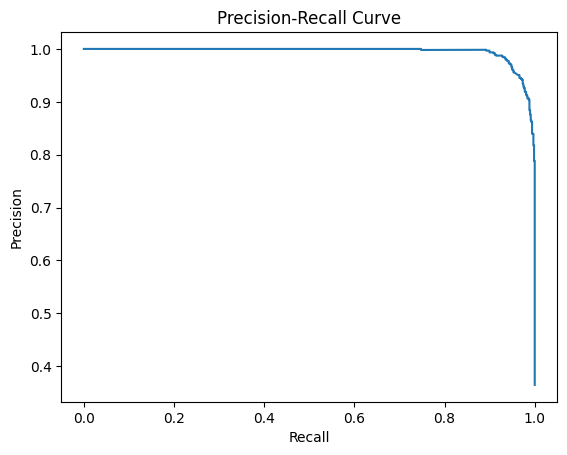

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_pred)

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_labels, target_names=["Normal", "Stone"]))


              precision    recall  f1-score   support

      Normal       0.97      0.98      0.98      1181
       Stone       0.97      0.95      0.96       678

    accuracy                           0.97      1859
   macro avg       0.97      0.96      0.97      1859
weighted avg       0.97      0.97      0.97      1859



In [ ]:
model.save('KidneyStone_model.h5')

In [ ]:
# from tensorflow.keras.models import load_model

# model = load_model('Kidney_Stone_model.h5')